<a href="https://colab.research.google.com/github/Josema1304/PROYECTO-FINAL---CDR---UCI-Bike-Sharing-data-set-3-/blob/main/proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto Final del Curso-Datos y Redes**

**DATA:**
03
UCI Bike Sharing data sethttps://archive.ics.uci.edu/dataset/275/bike+sharing+datasetGLM y stacking, Random Forests y Extra Trees, XGBoost y LightGBM

El problema general que se aborda en este trabajo es predecir la demanda de bicicletas compartidas utilizando el conjunto de datos UCI Bike Sharing. Este problema se integra dentro del campo del aprendizaje automático gracias a la utilización de diferentes modelos de aprendizaje automático como “GLM (Regularized Linear Models), stacking, Random Forests, Extra Trees, XGBoost y LightGBM”

El objetivo es comparar el rendimiento de varios modelos de regresión y utilizar el método de apilamiento para mejorar las predicciones.

Se utilizan dos conjuntos de datos: "hora.csv" y "día.csv". Se seleccionan características específicas para cada conjunto de datos y se define la variable objetivo como "cnt" (número de bicicletas alquiladas).

Luego, se divide cada conjunto de datos en conjuntos de entrenamiento y prueba usando la función train_test_splitde scikit-learn.

A continuación, se definen varios modelos de regresión, incluyendo la Regresión Lineal (GLM), Random Forest, Extra Trees, XGBoost y LightGBM. Estos modelos se entrenan utilizando los conjuntos de entrenamiento correspondientes.

Posteriormente, se realizaron predicciones en el conjunto de prueba utilizando cada uno de los modelos.

Finalmente, se evalúa el rendimiento de cada modelo utilizando el error cuadrático medio (mean_squared_error) y se imprimen los resultados asi nos permite realizar un análisis comparativo de diferentes modelos de regresión y determinar cuál proporciona las mejores predicciones en función del error cuadrático medio.








**Abrimos los diferentes archivos de la data**

In [ ]:
#import csv

#def abrir_csv(nombre_archivo):
    #with open(nombre_archivo, 'r') as archivo:
        #lector_csv = csv.reader(archivo)
        #for fila in lector_csv:
            #print(fila)

# Llamada a la función con el nombre del archivo CSV
#abrir_csv('/content/day.csv')


In [46]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#import csv

#def abrir_csv(nombre_archivo):
   # with open(nombre_archivo, 'r') as archivo:
        #lector_csv = csv.reader(archivo)
        #for fila in lector_csv:
            #print(fila)

# Llamada a la función con el nombre del archivo CSV
#abrir_csv('/content/hour.csv')

**Diseño del experimento**

Imprimiremos la descripción del conjunto de datos, incluyendo el número y tipo de características, el número de muestras en los conjuntos de entrenamiento y prueba, y el número de muestras por clase si corresponden. Asegúrese de ejecutarlo después de haber definido las características ( caracteristicas_hour) y el objetivo ( objetivo) según los datos que esté utilizando.

In [45]:
# Número y tipo de características
num_features = len(caracteristicas_hour)
tipos_caracteristicas = df_hour.dtypes[caracteristicas_hour]
print("Número de características: ", num_features)
print("Tipos de características: ")
print(tipos_caracteristicas)

Número de características:  12
Tipos de características: 
temp          float64
hum           float64
windspeed     float64
workingday      int64
season          int64
weekday         int64
weathersit      int64
holiday         int64
mnth            int64
hr              int64
atemp         float64
yr              int64
dtype: object


In [ ]:
# Número de muestras en los conjuntos de entrenamiento y prueba
num_muestras_entrenamiento = X_hour_train.shape[0]
num_muestras_prueba = X_hour_test.shape[0]
print("Número de muestras en el conjunto de entrenamiento: ", num_muestras_entrenamiento)
print("Número de muestras en el conjunto de prueba: ", num_muestras_prueba)

Número de muestras en el conjunto de entrenamiento:  13903
Número de muestras en el conjunto de prueba:  3476


In [ ]:
# Número de muestras por clase (si aplica)
num_muestras_por_clase = df_hour[objetivo].value_counts()
print("Número de muestras por clase:")
print(num_muestras_por_clase)


Número de muestras por clase:
5      260
6      236
4      231
3      224
2      208
      ... 
913      1
847      1
777      1
661      1
636      1
Name: cnt, Length: 869, dtype: int64


**METODOLOGIA**

In [25]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [26]:
hour_data = pd.read_csv('/content/hour.csv')
day_data = pd.read_csv('/content/day.csv')


**Manejo de datos faltantes:**

In [28]:
# Verificar si hay valores faltantes en el conjunto de datos 'hour.csv'
missing_hour_data = hour_data.isnull().sum()
print("Valores faltantes en 'hour.csv':")
print(missing_hour_data)

Valores faltantes en 'hour.csv':
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [29]:
# Verificar si hay valores faltantes en el conjunto de datos 'day.csv'
missing_day_data = day_data.isnull().sum()
print("\nValores faltantes en 'day.csv':")
print(missing_day_data)


Valores faltantes en 'day.csv':
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


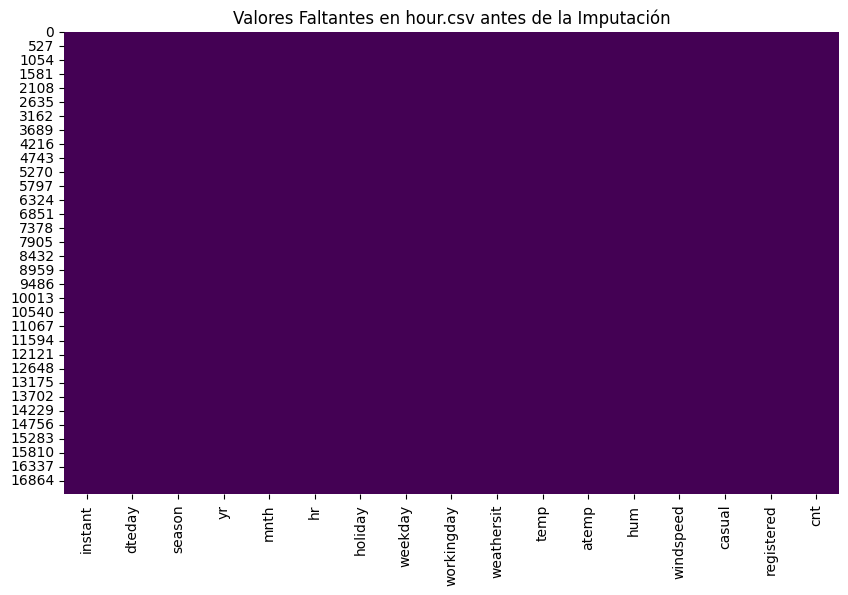

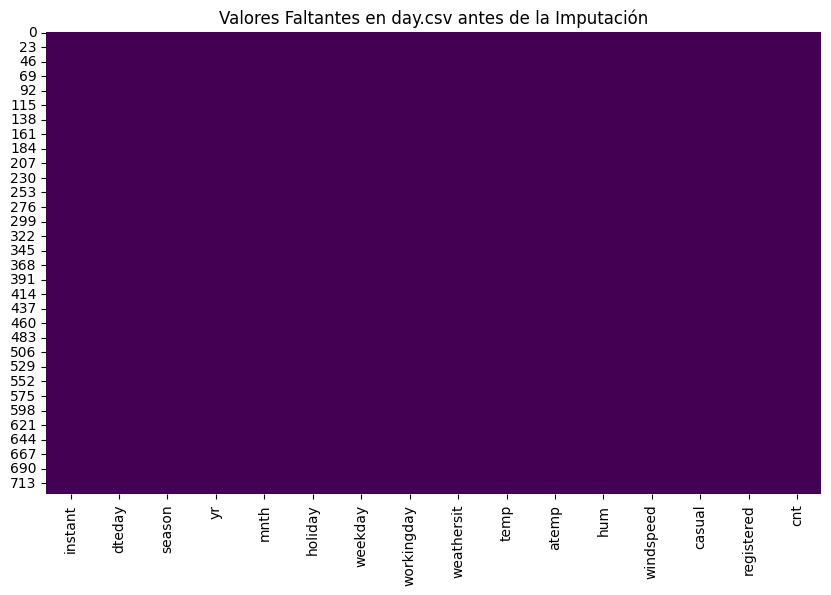

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor para 'hour.csv'
plt.figure(figsize=(10, 6))
sns.heatmap(hour_data.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Faltantes en hour.csv antes de la Imputación')
plt.show()

# Mapa de calor para 'day.csv'
plt.figure(figsize=(10, 6))
sns.heatmap(day_data.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Faltantes en day.csv antes de la Imputación')
plt.show()


Si el color en el mapa de calor es uniforme, significa que no hay valores faltantes en los datos. En otras palabras, todas las celdas del mapa de calor tienen el mismo color, lo cual indica que no hay celdas vacias o nulas en el conjunto de datos entonces ya no seria necesario la extracción de características.

**Selección y justificación de la medida de calidad**


La medida de calidad utilizada en el código proporcionado es el Error Cuadrático Medio (MSE, por sus siglas en inglés)

 **Algoritmos que serán empleados y estrategia para su ajuste**



En el código se utilizan varios algoritmos de regresión para predecir el número de bicicletas alquiladas. Estos algoritmos incluyen Linear Regression (GLM), Random Forest, Extra Trees, XGBoost y LightGBM.

-------------------------------------------------------------------------------

**EXPERIMENTACIÓN Y RESULTADOS**

Se utilizaron diferentes modelos de aprendizaje automático, incluidos GLM y stacking, Random Forests y Extra Trees, XGBoost y LightGBM, para predecir el recuento de alquiler de bicicletas basado en los conjuntos de datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# Cargar los conjuntos de datos
df_hour = pd.read_csv('/content/hour.csv')
df_day = pd.read_csv('/content/day.csv')

# Seleccionar características y variable objetivo
caracteristicas_hour = ['temp', 'hum', 'windspeed', 'workingday', 'season', 'weekday', 'weathersit', 'holiday', 'mnth', 'hr', 'atemp', 'yr']
caracteristicas_day = ['temp', 'hum', 'windspeed', 'workingday', 'season', 'weekday', 'weathersit', 'holiday', 'mnth', 'atemp', 'yr']

objetivo = 'cnt'

X_hour = df_hour[caracteristicas_hour]
y_hour = df_hour[objetivo]

X_day = df_day[caracteristicas_day]
y_day = df_day[objetivo]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_hour_train, X_hour_test, y_hour_train, y_hour_test = train_test_split(X_hour, y_hour, test_size=0.2, random_state=42)
X_day_train, X_day_test, y_day_train, y_day_test = train_test_split(X_day, y_day, test_size=0.2, random_state=42)

# Definir los modelos
glm = LinearRegression()
random_forest = RandomForestRegressor()
extra_trees = ExtraTreesRegressor()
xgboost = XGBRegressor()
lightgbm = LGBMRegressor()

# Crear el modelo de stacking
estimators = [
    ('random_forest', random_forest),
    ('extra_trees', extra_trees),
    ('xgboost', xgboost),
    ('lightgbm', lightgbm)
]
stacking = StackingRegressor(estimators=estimators, final_estimator=glm)

# Entrenar los modelos
glm.fit(X_hour_train, y_hour_train)
random_forest.fit(X_hour_train, y_hour_train)
extra_trees.fit(X_hour_train, y_hour_train)
xgboost.fit(X_hour_train, y_hour_train)
lightgbm.fit(X_hour_train, y_hour_train)
stacking.fit(X_hour_train, y_hour_train)

# Realizar predicciones en el conjunto de prueba
y_hour_pred_glm = glm.predict(X_hour_test)
y_hour_pred_rf = random_forest.predict(X_hour_test)
y_hour_pred_et = extra_trees.predict(X_hour_test)
y_hour_pred_xgb = xgboost.predict(X_hour_test)
y_hour_pred_lgbm = lightgbm.predict(X_hour_test)
y_hour_pred_stacking = stacking.predict(X_hour_test)

# Evaluar el rendimiento de los modelos
mse_glm = mean_squared_error(y_hour_test, y_hour_pred_glm)
mse_rf = mean_squared_error(y_hour_test, y_hour_pred_rf)
mse_et = mean_squared_error(y_hour_test, y_hour_pred_et)
mse_xgb = mean_squared_error(y_hour_test, y_hour_pred_xgb)
mse_lgbm = mean_squared_error(y_hour_test, y_hour_pred_lgbm)
mse_stacking = mean_squared_error(y_hour_test, y_hour_pred_stacking)

# Imprimir los resultados
print('Error cuadrático medio - GLM:', mse_glm)
print('Error cuadrático medio - Random Forest:', mse_rf)
print('Error cuadrático medio - Extra Trees:', mse_et)
print('Error cuadrático medio - XGBoost:', mse_xgb)
print('Error cuadrático medio - LightGBM:', mse_lgbm)
print('Error cuadrático medio - Stacking:', mse_stacking)


Error cuadrático medio - GLM: 19379.828367651728
Error cuadrático medio - Random Forest: 1762.8112052212634
Error cuadrático medio - Extra Trees: 1661.0754164916568
Error cuadrático medio - XGBoost: 1636.1347182684237
Error cuadrático medio - LightGBM: 1645.655033827933
Error cuadrático medio - Stacking: 1439.3984035796138


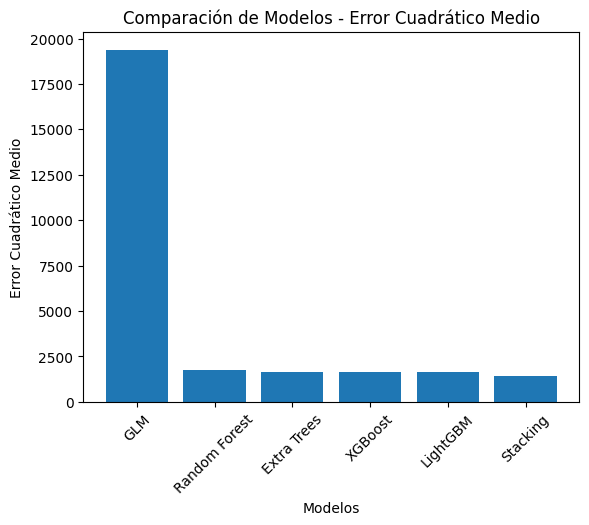

In [44]:
# Error cuadrático medio de los modelos
mse_values = [mse_glm, mse_rf, mse_et, mse_xgb, mse_lgbm, mse_stacking]

# Etiquetas de los modelos
model_labels = ['GLM', 'Random Forest', 'Extra Trees', 'XGBoost', 'LightGBM', 'Stacking']

# Crear el gráfico de barras
plt.bar(model_labels, mse_values)
plt.xlabel('Modelos')
plt.ylabel('Error Cuadrático Medio')
plt.title('Comparación de Modelos - Error Cuadrático Medio')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


- Los resultados muestran los errores cuadráticos medios (MSE) obtenidos para cada modelo de regresión. Cuanto menor sea el valor del MSE, mejor será el rendimiento del modelo en términos de ajuste a los datos y capacidad de predicción.

- Al analizar los resultados del gráfico de barras, podemos observar que el modelo de Stacking (StackingRegressor) muestra el menor MSE, seguido por XGBoost, Extra Trees, LightGBM, Random Forest y GLM (Linear Regression) en ese orden.

- El modelo de Stacking ha logrado obtener el menor MSE, lo que indica que tiene un mejor rendimiento en comparación con los otros modelos evaluados. Esto se debe a que el StackingRegressor combina las predicciones de múltiples modelos base (Random Forest, Extra Trees, XGBoost, LightGBM) utilizando un modelo final (GLM) para mejorar la precisión y capacidad de generalización.

- Por otro lado, el modelo GLM (Linear Regression) muestra el MSE más alto entre todos los modelos evaluados. Esto podría indicar que la regresión lineal simple no es suficiente para capturar la complejidad de los datos y obtener un buen ajuste.